In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
df = pd.read_csv('train_and_test2.csv')
df.head()

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [2]:
df.columns = df.columns.str.strip().str.lower()
print(df.columns.tolist())


['passengerid', 'age', 'fare', 'sex', 'sibsp', 'zero', 'zero.1', 'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'parch', 'zero.7', 'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13', 'zero.14', 'pclass', 'zero.15', 'zero.16', 'embarked', 'zero.17', 'zero.18', '2urvived']


In [3]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 28 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  1309 non-null   int64  
 1   age          1309 non-null   float64
 2   fare         1309 non-null   float64
 3   sex          1309 non-null   int64  
 4   sibsp        1309 non-null   int64  
 5   zero         1309 non-null   int64  
 6   zero.1       1309 non-null   int64  
 7   zero.2       1309 non-null   int64  
 8   zero.3       1309 non-null   int64  
 9   zero.4       1309 non-null   int64  
 10  zero.5       1309 non-null   int64  
 11  zero.6       1309 non-null   int64  
 12  parch        1309 non-null   int64  
 13  zero.7       1309 non-null   int64  
 14  zero.8       1309 non-null   int64  
 15  zero.9       1309 non-null   int64  
 16  zero.10      1309 non-null   int64  
 17  zero.11      1309 non-null   int64  
 18  zero.12      1309 non-null   int64  
 19  zero.1

passengerid    0
age            0
fare           0
sex            0
sibsp          0
zero           0
zero.1         0
zero.2         0
zero.3         0
zero.4         0
zero.5         0
zero.6         0
parch          0
zero.7         0
zero.8         0
zero.9         0
zero.10        0
zero.11        0
zero.12        0
zero.13        0
zero.14        0
pclass         0
zero.15        0
zero.16        0
embarked       2
zero.17        0
zero.18        0
2urvived       0
dtype: int64

In [6]:
if 'age' in df.columns:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['age'] = df['age'].fillna(df['age'].median())
if 'embarked' in df.columns:
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [7]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)
cols_to_encode = [col for col in categorical_cols if df[col].nunique() < 10 and col not in ['name', 'ticket']]
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=True)

Categorical columns: []


In [9]:
if 'cabin' in df.columns:
    df['cabin'] = df['cabin'].fillna('Unknown')
    le = LabelEncoder()
    df['cabin_code'] = le.fit_transform(df['cabin'].astype(str))

In [11]:
scale_cols = ['age', 'fare'] if all(col in df.columns for col in ['age', 'fare']) else []
scaler = StandardScaler()
df[scale_cols] = scaler.fit_transform(df[scale_cols])

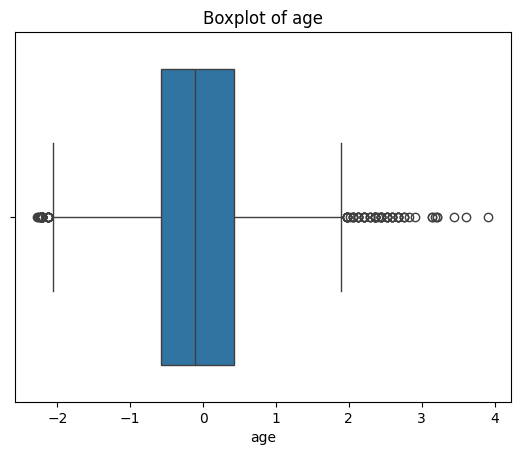

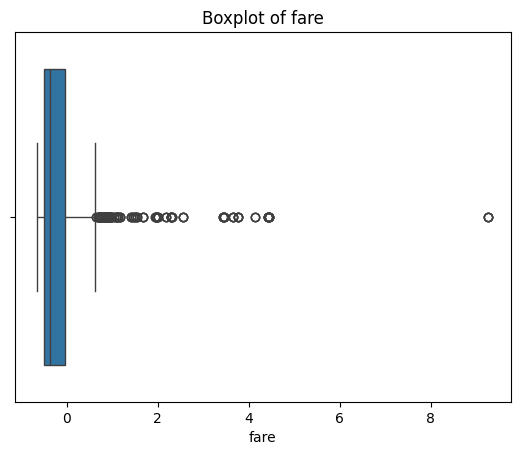

In [12]:
for col in scale_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()
for col in scale_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]


In [13]:
df.to_csv('cleaned_train_and_test2.csv', index=False)

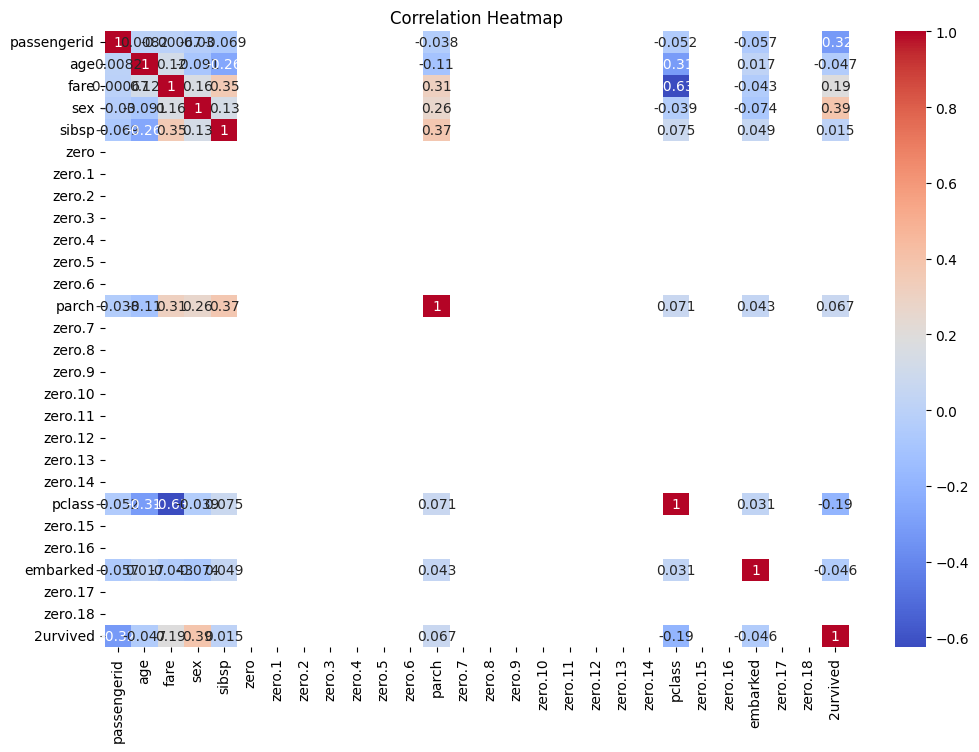

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()